In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras import backend as K
from tensorflow.keras.datasets import mnist

from src.simple_cnn import SimpleCNN

%load_ext autoreload
%autoreload 2

# path_data = "/path/to/mnist.npz"

IMG_SHAPE = (28, 28, 1)
NUM_CLASSES = 10
BATCH_SIZE = 10
EPOCHS = 3

img_rows = IMG_SHAPE[0]
img_cols = IMG_SHAPE[1]
 
## Load Data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# data = np.load(path_data)
# (x_train, y_train), (x_test, y_test) = (data["x_train"], data["y_train"]), (data["x_test"], data["y_test"])
 
# Normalize and Reshape Data:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)
 
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

print(y_train.shape)
print(y_test.shape)
print()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print("final shape (x_train):", x_train.shape)
print("final shape (x_test):", x_test.shape)
print("final shape (y_train):", y_train.shape)
print("final shape (y_test):", y_test.shape)
print()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)

final shape (x_train): (60000, 28, 28, 1)
final shape (x_test): (10000, 28, 28, 1)
final shape (y_train): (60000, 10)
final shape (y_test): (10000, 10)



In [13]:
def evaluate_cnn(cnn):
    score = cnn.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print()
 
    for ii in range(5):
        truth = np.argmax(y_test[ii])
    #     pred = cnn.predict(x_test[ii:ii+1])
        arr_prob = cnn.predict_proba(x_test[ii:ii+1])
        prob = np.max(arr_prob)
        pred = np.argmax(arr_prob)
        ss = "truth: {}, pred: {}, proba: {}"
        print(ss.format(str(truth), str(pred), str(prob)))

## Experiments with layer dimensions

In [ ]:
# DIMS = [32, 64, 128] # ~98% after 3 epochs
# M = SimpleCNN(IMG_SHAPE, NUM_CLASSES)
# cnn = M.cnn
# cnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

DIMS = [32, 32, 64] # 
M = SimpleCNN(IMG_SHAPE, NUM_CLASSES)
cnn = M.cnn
cnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

# DIMS = [16, 16, 128] # ~98% after 3 epochs
# M = SimpleCNN(IMG_SHAPE, NUM_CLASSES)
# cnn = M.cnn
# cnn.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [14]:
evaluate_cnn(cnn)

Test loss: 0.058863685815175995
Test accuracy: 0.9799

truth: 7, pred: 7, proba: 0.9999931
truth: 2, pred: 2, proba: 0.99995744
truth: 1, pred: 1, proba: 0.99964035
truth: 0, pred: 0, proba: 0.9997073
truth: 4, pred: 4, proba: 0.9992348


In [84]:
results = cnn.predict(x_test)

df = pd.DataFrame({"truth": np.argmax(y_test, axis=1),
                   "prediction": np.argmax(results, axis=1),
                   "score": np.amax(results, axis=1),                   
                  })
df.head()

,truth,prediction,score
0,7,7,0.999993
1,2,2,0.999957
2,1,1,0.999640
3,0,0,0.999707
4,4,4,0.999235


In [75]:
df[(df["score"] < .6) & (df["score"] > .5)]

,truth,prediction,score
33,4,4,0.527023
92,9,4,0.537735
217,6,5,0.565685
448,9,8,0.513847
479,9,9,0.548559
542,8,8,0.517562
591,8,8,0.572259
659,2,1,0.504675
684,7,3,0.541154
691,8,8,0.555370


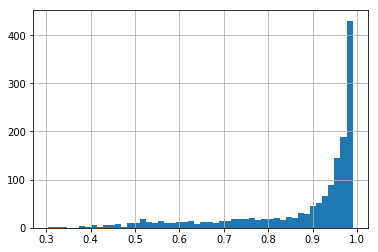

In [90]:
df[df["score"] < .99]["score"].hist(bins=50)

```
ValueError: Colormap grey is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r
```

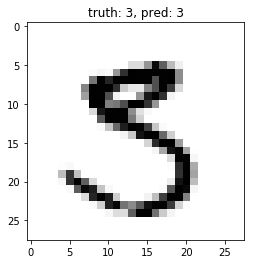

In [83]:
# im = x_test[0]
# im = im.reshape(im.shape[:2])

def foo(truth, pred, img):
    img = img.reshape(im.shape[:2])
    plt.title("truth: {}, pred: {}".format(truth, pred))
    plt.imshow(img, cmap='Greys')
    plt.show

def bar(ii):
    foo(df["truth"].iloc[ii], df["prediction"].loc[ii], x_test[ii])
              
ii = 938
bar(ii)